In [4]:
import numpy  as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
input_data = load_breast_cancer()

In [5]:
input_data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [6]:
input_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
input_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
X = input_data.data
y = input_data.target

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


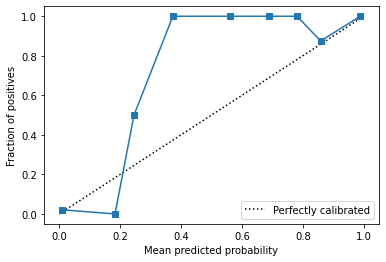

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve, CalibrationDisplay


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
disp.plot()

In [12]:
clf.predict_proba(X_test)[:,1]

array([6.07709319e-03, 9.70371362e-01, 9.97622038e-01, 7.98208257e-01,
       9.99884617e-01, 9.96759575e-01, 9.91033683e-01, 9.98120606e-01,
       9.63286443e-01, 9.99695299e-01, 5.44756857e-01, 8.36887378e-01,
       9.95204393e-01, 2.13984595e-01, 7.88745059e-01, 6.37976952e-03,
       9.85786971e-01, 1.34458815e-09, 1.48535087e-03, 1.95810922e-12,
       1.47364182e-05, 8.19132595e-02, 9.98342705e-01, 9.87525136e-01,
       9.92569332e-03, 9.88940601e-01, 9.97857775e-01, 1.69035724e-01,
       9.96598465e-01, 2.00830731e-11, 9.99558274e-01, 1.63272920e-08,
       5.74810370e-01, 4.13770957e-04, 9.99774972e-01, 1.11875671e-03,
       9.07300645e-01, 1.54024692e-06, 9.95978770e-01, 2.58436510e-04,
       5.13110774e-02, 9.95854230e-01, 1.76037084e-03, 9.99027045e-01,
       3.85049070e-02, 6.72608343e-13, 9.99649942e-01, 9.69877357e-01,
       9.98587809e-01, 2.51997842e-04, 3.39044375e-06, 2.76875225e-01,
       3.48087345e-07, 9.95368381e-01, 9.90372513e-01, 9.98952130e-01,
      

In [13]:
score = clf.score(X_test, y_test)

In [14]:
score

0.958041958041958

In [15]:
clf = LogisticRegression(multi_class='multinomial',penalty='l1', solver='saga', tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 13.33%
Test score with L1 penalty: 0.8951


In [16]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=25)
pca.fit(X_train)
X = pca.transform(X_train)
clf = LogisticRegression(multi_class='multinomial',penalty='elasticnet', solver='saga', tol=0.1, l1_ratio=0.20)
clf.fit(X, y_train)
X1 = pca.transform(X_test)
score = clf.score(X1, y_test)
score

0.9300699300699301